# <center>Classification Bank Client data Job

<div class="">
<br><br>
<center><br><font size="12"><font face="calibri"><strong>Kecerdasan Buatan
<center><br><font size="5"><font face="calibri"><strong>Bank Telemarketing Analysis Machine Learning
<br>
<br>
<br><strong>Oleh :
<br><strong>Kms.Irwan Gunawan
<br><strong>09011181722077
<br><br>
<br><strong>Mata Kuliah Kecerdasan Buatan
<br>
<br><strong>Dosen Pengampuh : 
<br><strong>Prof. Dr. Ir. Siti Nurmaini, M.T.
<br><br><br>
<br><strong>Jurusan Sistem Komputer
<br><strong>Fakultas Ilmu Komputer
<br><strong>Universitas Sriwijaya
<br><strong>2018

# Import Modul yang diperlukan

Modul Yang diperlukan adalah

a. `numpy dan Pandas `
    Ke 2 modul ini sudah standar dan wajib digunakan apabila diimport untuk menghandle data.

b. `Matplotlib`
    Matloplib ialah Library yang digunakan untuk men-plot hasil loss dan akurasi nanti.
    
c. `sklearn`
    Adapun pada library sklearn ini, fungsi yang dipakai adalah
    1. PCA(Principal Component Analysis) => mereduksi fitur
    2. train_test_split  => Untuk men-split data menjadi training dan testing
    3. classification_report => mendapatkan hasil pengukuran CM
    4. confusion_matrix  => mengukur performa model learning 

d. `keras`
    Pada Keras , Fungsi yang dipakai adalah :
    1. Layers Dense
    2. Optimizers Adam
    3. Model Sequential
    4. utils to_categorical
    5. Aktivasi Relu
   

In [4]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder # ngubah categori ke angka
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix

# Dataset
    Data set yang dipakai adalah BANK. Data ini bisa didapat di kaggle
    Link Dataset BANK : 
    
https://www.kaggle.com/yufengsui/ml-project-bank-telemarketing-analysis

    Dataset ini bersumberkan dari Portuguese Bank Marketing Data Set . Dataset ini sudah didownsampling menjadi 125 node 
    perdetik oleh Aurelia Sui. 
    
<h3>The PTB Diagnostic ECG Database</h3>
<ul>
    <li><strong> Jumlah data</strong> : 4552</li>
    <li> <strong>Sumber data</strong> : Portuguese Bank Marketing Data</li>
</ul>


## Fitur data set

Fitur dataset ini berupa beat yang terdiri atas 17

## Label Dataset

Jumlah job pada kolom label : `12`

  Label yang akan diklasifikasikan adalah job
  

# Import Data Set

Dataset Bank 

    1.bank.csv   => Data set bank


In [3]:
df = pd.read_csv ('D:/FILE KULIAH/Semester 5/AI/UAS/bank.csv', sep=';') 

#### df.head menampilkan data set Bank 5 teratas

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [5]:
df.shape

(4521, 17)

In [6]:
df.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [7]:
enc = LabelEncoder()
dataset = df.apply(enc.fit_transform)
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,3,0
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0,0
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0,0
3,11,4,1,2,0,1352,1,1,2,2,6,195,3,0,0,3,0
4,40,1,1,1,0,274,1,0,2,4,8,222,0,0,0,3,0


In [8]:
dataset.shape

(4521, 17)

# Pemisahan antara Fitur dan Label pada dataset

    Fitur dan Label dipisah supaya mesin bisa mempelajari fitur dari label yang diberikan.
    Fitur
    x = iloc value
    
    Label
    y = iloc value

In [9]:
x= dataset.iloc[:,:16].values
y = dataset.iloc[:,16].values

#### kemudian di rubah menjadi bilangan binnary

In [9]:
dataset.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,22.168104,4.411192,1.147755,1.231365,0.016810,894.699624,0.566025,0.152842,0.652289,14.915284,5.540146,241.323380,1.783234,25.368503,0.539925,2.559168,0.115240
std,10.568155,3.255716,0.599650,0.748744,0.128575,632.935320,0.495676,0.359875,0.901498,8.247667,3.002763,196.360039,2.997180,63.823284,1.661181,0.992051,0.319347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,1.000000,1.000000,1.000000,0.000000,343.000000,0.000000,0.000000,0.000000,8.000000,3.000000,100.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,20.000000,4.000000,1.000000,1.000000,0.000000,697.000000,1.000000,0.000000,0.000000,15.000000,6.000000,181.000000,1.000000,0.000000,0.000000,3.000000,0.000000
75%,30.000000,7.000000,2.000000,2.000000,0.000000,1354.000000,1.000000,0.000000,2.000000,20.000000,8.000000,325.000000,2.000000,0.000000,0.000000,3.000000,0.000000
max,66.000000,11.000000,2.000000,3.000000,1.000000,2352.000000,1.000000,1.000000,2.000000,30.000000,11.000000,874.000000,31.000000,291.000000,23.000000,3.000000,1.000000


# Preprocessing dataset.

Dataset yang diambil pada kaggle ini sudah dipreprosessing oleh `Aurelia Sui` dengan cara :
    
    1. Scaling => mengubah nilai data menjadi 0 sampai 1

In [10]:
scaler= MinMaxScaler()
feature_scaled=scaler.fit_transform(x)
feature_scaled.shape

(4521, 16)

In [12]:
np.unique(y)

array([0, 1], dtype=int64)

## Splitting data

    Data fitur dan label dibagi menjadi data train dan test dengan ratio 9 : 1

In [13]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, random_state=2)

# Model ANN

Jaringan saraf tiruan (JST) atau sistem koneksionis adalah sistem komputasi yang secara samar-samar terinspirasi oleh jaringan saraf biologis yang membentuk otak hewan.

Disini digunakan model `Sequential()`. Pada Model ini terdapat `Input layer` , `Hidden layer` dan `Output layer`. 

<strong>Penentuan Jumlah Layer ditentukan sebagai berikut </strong>:

    a. Jumlah dari input layer ialah sama dengan jumlah fitur yang diberikan kepada mesin yang ada.
    b. Jumlah dari Hidden layer ditentukan dengan sesuai atau lebih besar dari Input layer yang di berikan.
    c. Jumlah dari Output Layer sesuai dengan kolom yang diberikan kepada mesin.
  
  
<strong>Jumlah layer yang ditentukan adalah </strong>:

    1. Input layer          -> Layer pertama terbentuk dari 12 layer Neural sesuai fitur dengan menggunakan activation                                    relu.
    2. Hidden Layer pertama -> 12 units Neural Network dengan menggunakan activation relu.
    3. Hidden Layer Kedua   -> 12 units Neural Network dengan menggunakan activation relu.
    4. Output layer         -> 1 unit Neural Network dengan menggunakan activation sigmoid.

In [14]:
model = Sequential()
model.add(Dense(units= 100, input_dim =16 , activation='relu'))
model.add(Dense(units= 100, activation='relu'))
model.add(Dense(units= 1, activation='sigmoid'))

# Compile Model

Model Dicompile dengan Optimizer adam dengan fungsi loss Binary Crossentropy.

    Disini ada parameter optimizer adam('adam' adalah pengoptimal default yang baik untuk digunakan, dan umumnya akan bekerja dengan baik) yaitu learning_rate.
                                
    Learning_rate yaitu seberapa teliti mesin itu belajar.Semakin kecil nilai learning rate ,maka semakin teliti mesin belajar dan semakin tinggi kesempatan untuk mendapatkan hasil yang bagus.    

    Learning rate yang tinggi memiliki kelemahan yaitu, waktu untuk proses training yang lama.

In [15]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# MenTraining model dengan data train serta Validasi dengan data Test

Model yang sudah dibentuk itu dilakukan proses pembelajaran sesuai dengan **data train** dan menvalidasi proses pembelajaran mesin dengan data validasi yaitu **data testing**. 

Adapun parameter yang bisa di tuning yaitu :

1. `batch_size` => 16 size
2. `epochs`  => 1000 epochs, Seberapa banyak mesin mengulang pembelajaran sampai nilai weight tidak berubah lagi. Nilai epochs yang direkomendasikan adalah 100-1000 karena biasanya dengan nilai 100-1000, performa mesin sudah konvergen.

In [19]:
acc_training = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=16, 
                         epochs=1000)

Train on 4068 samples, validate on 453 samples
Epoch 1/1000
4068/4068 [==============================] - 0s 83us/step - loss: 0.3929 - accuracy: 0.8751 - val_loss: 0.3373 - val_accuracy: 0.8918
Epoch 2/1000
4068/4068 [==============================] - 0s 78us/step - loss: 0.3277 - accuracy: 0.8842 - val_loss: 0.3146 - val_accuracy: 0.8698
Epoch 3/1000
4068/4068 [==============================] - 0s 83us/step - loss: 0.3330 - accuracy: 0.8813 - val_loss: 0.5547 - val_accuracy: 0.9007
Epoch 4/1000
4068/4068 [==============================] - 0s 83us/step - loss: 0.4059 - accuracy: 0.8766 - val_loss: 0.4791 - val_accuracy: 0.8918
Epoch 5/1000
4068/4068 [==============================] - 0s 81us/step - loss: 0.3332 - accuracy: 0.8795 - val_loss: 0.3758 - val_accuracy: 0.8808
Epoch 6/1000
4068/4068 [==============================] - 0s 85us/step - loss: 0.3217 - accuracy: 0.8850 - val_loss: 0.2681 - val_accuracy: 0.8985
Epoch 7/1000
4068/4068 [==============================] - 0s 85us/step 

# Perhitungan Akurasi

In [20]:
acc_testing  = model.evaluate(x_test, y_test) 
acc_testing

453/453 [==============================] - 0s 17us/step


[0.4406925284573048, 0.8587196469306946]

# Evaluasi Model dengan Melihat Plot

Kasus : 

1. `Fit`
    Fit apabila hasil akurasi dari data testing *tidak berbeda jauh* daripada data training. *Kasus yang inilah yang paling bagus*.

2. `Underfitting`
    Underfitting terjadi apabila hasil akurasi dari data testing itu *lebih rendah* daripada data training.

3. `Overfitting`
    Overfitting terjadi apabila hasil akurasi dari data testing itu *lebih tinggi* daripada data training.

# Plot hasil Akurasi antara Training dan Testing

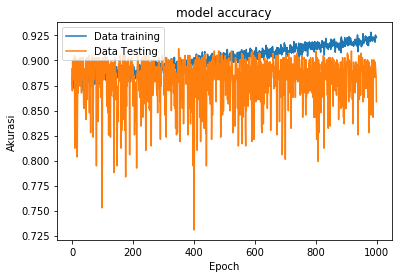

In [21]:
plt.plot(acc_training.history['accuracy'])
plt.plot(acc_training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.show()

# Plot hasil Loss antara Training dan Testing

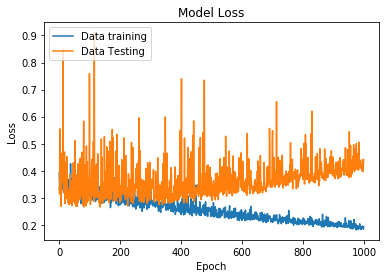

In [22]:
plt.plot(acc_training.history['loss'])
plt.plot(acc_training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.show()

# Confusion Matrix
    Confusion Matrix adalah sebuah tabel yang berisi 2 jenis nilai yaitu Nilai Dataset(nilai yang benar) dan  Nilai prediksi. Nilai tersebut dipecah menjadi 4 dan akan dibandingkan untuk mendapatkan informasi tentang performa model learning.
    
  Misal : `0` ( positive ) dan `1` ( negative ).
    1. True Positive = Mesin memprediksi positive dan benar
    2. True Negative = Mesin memprediksi negative dan benar
    3. False Positive = Mesin memprediksi Positive dan negative 
    4. False Negative = Mesin memprediksi negative dan positive

In [20]:
prediction = model.predict_classes(x_test)
cm = confusion_matrix(y_test, prediction)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

In [21]:
print ("Confussion matriks:\n",cm)

Confussion matriks:
 [[409   2]
 [ 42   0]]


# Evaluasi Model menggunakan Confusion Matrix

Confusion matrik ada banyak penilaian yang bisa diambil untuk mengukur performa pada model learning. Namun yang paling sering dipakai ialah :

1. `Presisi`
    Perbandingan prediksi kelas yang `positif yang benar` dengan semua prediksi kelas `positif`.

            Presisi = TP/(TP+FP)

2. `Recall`
    Seberapa akurat mesin untuk mengklasifikasi kelas yang `positif`.

            Recall = TP/(TP+FN)

3. `F1`
    Nilai rata-rata dari Recall dan Presisi 
        
            F1 = (2*Presisi*recall) / (presisi+recall)

        
4. `Akurasi`
    Perbandingan Seberapa banyak model mengklasifikasi kelas yang benar dengan total kelas yang ada.

            Akurasi = (TP+TN)/(TP+TN+FP+FN)

5. `Sensitivity`
            `Sensitivity` tp/(tp + fn)

In [22]:
precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
Sensitivity = tp/(tp + fn)

In [23]:
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  0.9951338199513382
recall :  0.9068736141906873
F1 :  0.9489559164733178
sensitivity :  0.9068736141906873
akurasi :  0.9028697571743929
